# Breast Cancer Prediction using Naive Bayes Classifier

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<AxesSubplot:>

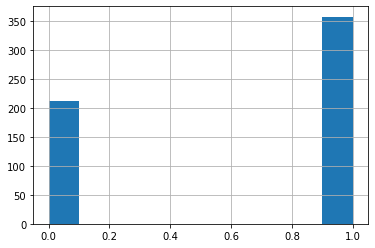

In [194]:
data.diagnosis.hist()

<AxesSubplot:>

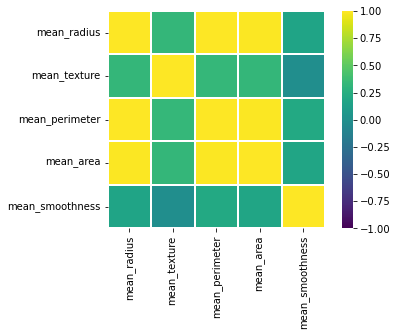

In [195]:
from matplotlib import colormaps

corr = data.iloc[:,:-1].corr()
sns.heatmap(corr, vmin=-1, vmax=1, square=True, cmap = colormaps['viridis'], linewidths=0.2)

<AxesSubplot:>

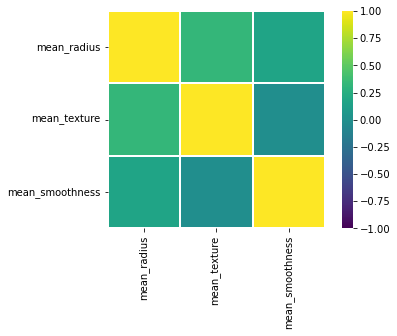

In [196]:
data = data[['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis']]
corr = data.iloc[:,:-1].corr()
sns.heatmap(corr, vmin=-1, vmax=1, square=True, cmap = colormaps['viridis'], linewidths=0.2)

<AxesSubplot:xlabel='mean_smoothness', ylabel='Count'>

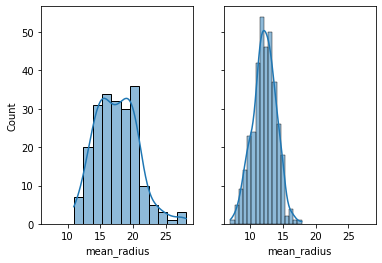

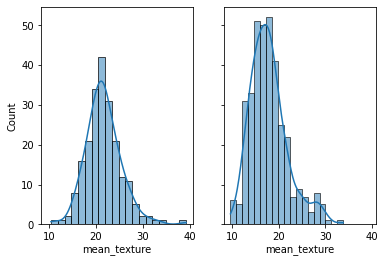

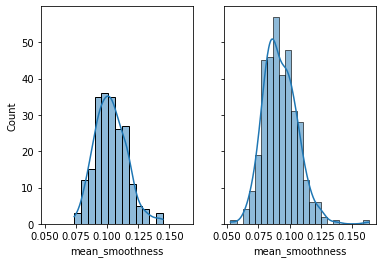

In [197]:
data_0 = data[data['diagnosis']==0]
data_1 = data[data['diagnosis']==1]

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
sns.histplot(data_0, x='mean_radius', ax=axes[0], kde=True)
sns.histplot(data_1, x='mean_radius', ax=axes[1], kde=True)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
sns.histplot(data_0, x='mean_texture', ax=axes[0], kde=True)
sns.histplot(data_1, x='mean_texture', ax=axes[1], kde=True)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
sns.histplot(data_0, x='mean_smoothness', ax=axes[0], kde=True)
sns.histplot(data_1, x='mean_smoothness', ax=axes[1], kde=True)

In [199]:
from scipy.stats import norm

def gaussian_naive_bayes(train, X):
    p_prior = train.iloc[:,-1].mean()
    means_variances_0 = {}
    means_variances_1 = {}
    data_0 = train[train['diagnosis']==0]
    data_1 = train[train['diagnosis']==1]

    for feature in X.columns:
        means_variances_0[feature] = [data_0[feature].mean(), data_0[feature].std()]
        means_variances_1[feature] = [data_1[feature].mean(), data_1[feature].std()]

    Y = []
    for _, x in X.iterrows():
        log_likelihood = [np.log(1-p_prior), np.log(p_prior)]
        for f in X.columns:
            log_likelihood[0] += np.log(norm(means_variances_0[f][0], means_variances_0[f][1]).pdf(x[f]))
            log_likelihood[1] += np.log(norm(means_variances_1[f][0], means_variances_1[f][1]).pdf(x[f]))
        Y.append(np.argmax(log_likelihood))
        
    return Y

In [200]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=.2)
test_X = test.iloc[:,:-1]
test_Y = test.iloc[:,-1].values
pred_Y = gaussian_naive_bayes(train, test_X)

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(test_Y, pred_Y))
print(f1_score(test_Y, pred_Y))


[[32  8]
 [ 3 71]]
0.9281045751633986
